In [41]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [45]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [46]:
y_test.shape

(10000,)

In [3]:
#rows,cols=28,28

In [4]:
#x_train=x_train.reshape(x_train.shape[0],rows,cols,1)
#x_test=x_test.reshape(x_test.shape[0],rows,cols,1)

In [5]:
#input_shape = (rows,cols,1)

In [7]:
#x_test.shape

(10000, 28, 28, 1)

In [34]:
#x_train=x_train.astype('float32')
#x_test=x_test.astype('float32')
#x_train=x_train/255.0
#x_test=x_test/255.0

#y_test = tf.keras.utils.to_categorical(y_test)
#y_train = tf.keras.utils.to_categorical(y_train)

In [47]:
from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD
# metrics 
from keras.metrics import categorical_crossentropy
# optimization method
from keras.optimizers import SGD

def LeNet():
  model = Sequential()
  
  # Convolutional layer  
  model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'same', 
                   activation = 'relu', input_shape = (28,28,1)))
  
  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Convolutional layer 
  model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = 'relu'))
  
  # Max-pooling layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  # Flatten layer 
  model.add(Flatten())
  
  # The first fully connected layer 
  model.add(Dense(120, activation = 'relu'))
  
  # The output layer  
  model.add(Dense(10, activation = 'softmax'))
  
  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy, 
  # we use Stochastic Gradient Descent (SGD) method with learning rate lr = 0.01 
#to optimize the loss function
  # metric: accuracy 
  
  opt = SGD(lr = 0.01)
  model.compile(loss = categorical_crossentropy, 
                optimizer = opt, 
                metrics = ['accuracy']) 
                
  return model


In [51]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  dia=summary_history(history)

  return dia

In [52]:
X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)

In [53]:
lenet_model=LeNet()
epoch=10
batch_size=128


c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [54]:

history = lenet_model.fit(X_train, y_train, epochs = epoch, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)

Epoch 1/10
468/468 [==============================] - 24s 43ms/step - loss: 0.9326 - accuracy: 0.7396 - val_loss: 39.6251 - val_accuracy: 0.9057
Epoch 2/10
468/468 [==============================] - 20s 44ms/step - loss: 0.2907 - accuracy: 0.9126 - val_loss: 29.0562 - val_accuracy: 0.9325
Epoch 3/10
468/468 [==============================] - 22s 47ms/step - loss: 0.2107 - accuracy: 0.9362 - val_loss: 21.2948 - val_accuracy: 0.9502
Epoch 4/10
468/468 [==============================] - 22s 47ms/step - loss: 0.1658 - accuracy: 0.9504 - val_loss: 18.3977 - val_accuracy: 0.9555
Epoch 5/10
468/468 [==============================] - 21s 45ms/step - loss: 0.1389 - accuracy: 0.9577 - val_loss: 15.7361 - val_accuracy: 0.9630
Epoch 6/10
468/468 [==============================] - 21s 45ms/step - loss: 0.1206 - accuracy: 0.9642 - val_loss: 14.5230 - val_accuracy: 0.9660
Epoch 7/10
468/468 [==============================] - 21s 45ms/step - loss: 0.1074 - accuracy: 0.9677 - val_loss: 14.6042 - val_ac

313/313 [==============================] - 2s 6ms/step - loss: 9.6759 - accuracy: 0.9777
97.770


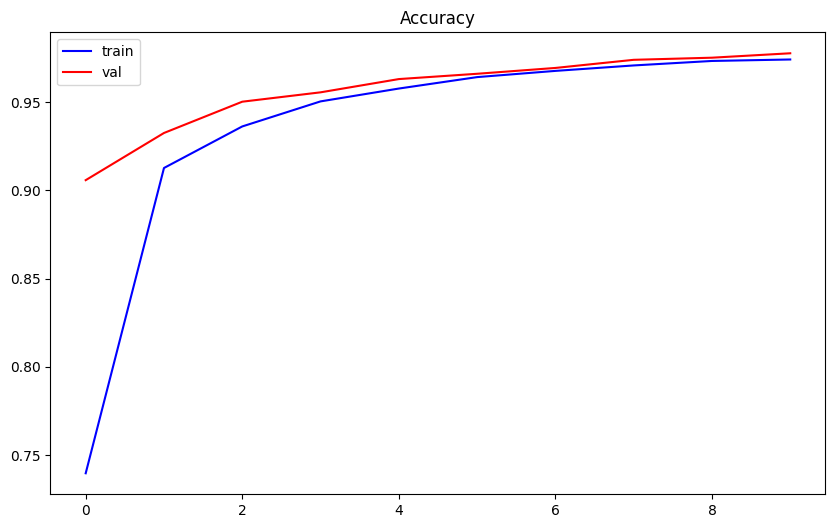

In [55]:
_, acc = lenet_model.evaluate(X_test, y_test, verbose = 1)
print('%.3f' % (acc * 100.0))
summary_history(history)

In [40]:
y_test.shape

(10000, 10, 10, 2)

In [35]:
def lenet(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5),
                                    strides=(1,1),activation='relu',
                                    input_shape=input_shape))

    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                                strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),
                                    strides=(1,1),activation='relu'))

    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),
                                                strides=(2,2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=120,activation='relu'))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=84,activation='relu'))

    model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.0),metrics=['accuracy'])
    
    return model

    

In [36]:
lenet_model=lenet(input_shape)

In [37]:
y_train.shape

(60000, 10, 10, 2)

In [38]:
epoch=10
history = lenet_model.fit(x_train,y_train,epochs=epoch,batch_size=128,verbose=1)



Epoch 1/10


ValueError: in user code:

    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10, 2) and (None, 10) are incompatible
